In [0]:
# To see plots "in-line" in your Notebook, you must use this command
%matplotlib inline

## Using Keras for Classification on MNIST

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## Load training data

In [0]:
batch_size = 128
num_classes = 10
epochs = 1


# input image dimensions
img_rows, img_cols = 28, 28


# the data, shuffled and split between tran and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In the next step, we will format/prepare the data for our CNN.<br/>
But before we do that, let's look at some examples of the training data.

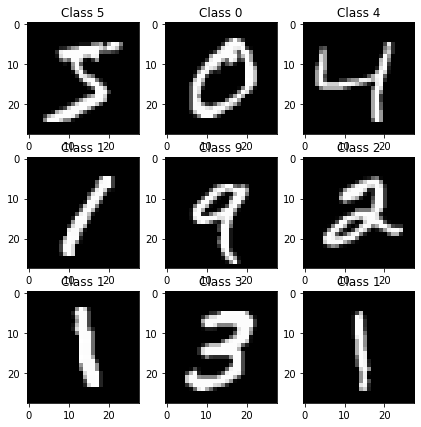

In [0]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Format the data for training

## Keras Backend
Our backend, Tensorflow, uses a "channels_last" ordering.<br/> 
Other backends for Keras, such as Theano, use other orderings.<br/>
The following lines handle such exceptions. 

You should never need to worry about other backends, so the if/else statement is really <br/>
just for informational purposes.

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Next, we'll change the data to 'float32'.<br/>
We'll also scale the inputs to be in the range [0-1] rather than [0-255].

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Modify the label vectors to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build sequential convolutional model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compile the model: Loss, Optimizer, Metrics

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the model!

In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 115s 2ms/step - loss: 1.3692 - acc: 0.5168 - val_loss: 0.3254 - val_acc: 0.9044
Epoch 2/3
60000/60000 [==============================] - 119s 2ms/step - loss: 0.4076 - acc: 0.8748 - val_loss: 0.2259 - val_acc: 0.9297
Epoch 3/3
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3256 - acc: 0.9021 - val_loss: 0.1790 - val_acc: 0.9446


## Finally, evaluate its performance

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17896980594396592
Test accuracy: 0.9446


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane.<br/>
Here we'll look at some examples it gets right, and some examples it gets wrong.

In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/anaconda3/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/anaconda3/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  import sys


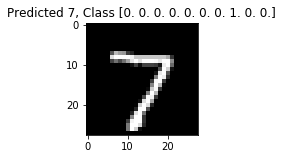

In [0]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## 